## Introduction au Projet et à son Objectif

L'objectif de ce projet est d'explorer les techniques de débruitage d'images à l'aide de la bibliothèque OpenCV, l'une des ressources les plus puissantes et polyvalentes pour le traitement d'images en Python. Le débruitage d'images est une étape cruciale dans le traitement d'images et la vision par ordinateur, car il permet d'éliminer ou de réduire les imperfections visuelles indésirables qui peuvent être présentes dans une image, telles que le bruit gaussien, le bruit de Poisson, ou le bruit de type "sal et poivre."

Dans ce projet, nous allons plonger dans le monde du débruitage d'images en explorant différentes méthodes et en évaluant leur efficacité. Nous commencerons par comprendre les bases du bruit dans les images, puis nous introduirons les concepts fondamentaux du débruitage d'images.

L'objectif principal de ce projet est de :
- Vous familiariser avec les techniques de débruitage d'images disponibles dans OpenCV.
- Vous montrer comment appliquer ces techniques sur une image d'exemple.
- Évaluer et comparer les résultats obtenus avec différentes méthodes de débruitage.
- Discuter des avantages et des limitations de chaque méthode.

À la fin de ce projet, vous devriez avoir une compréhension solide des techniques de débruitage d'images dans OpenCV et être en mesure de les appliquer à des images réelles pour améliorer leur qualité visuelle. Préparez-vous à explorer le monde passionnant du traitement d'images et à acquérir des compétences utiles pour de nombreuses applications de vision par ordinateur.


## Définitions

### Bruit dans les Images

Le bruit dans les images fait référence aux variations indésirables de la luminosité ou de la couleur des pixels qui peuvent affecter la qualité visuelle d'une image. Il peut être causé par divers facteurs, notamment la sensibilité du capteur, les conditions d'éclairage, le processus de capture et les erreurs de transmission. Voici quelques types courants de bruit dans les images :

1. **Bruit Gaussien :** Le bruit gaussien est aléatoire et suit une distribution gaussienne. Il se manifeste sous forme de variations de pixels qui ressemblent à un « flou » léger.

2. **Bruit de Poisson :** Le bruit de Poisson est courant dans les images à faible luminosité. Il est dû aux variations statistiques dans le nombre de photons détectés par le capteur.

3. **Bruit "Sal et Poivre" :** Le bruit "sal et poivre" se caractérise par l'apparition de pixels noirs (bruit "sal") et blancs (bruit "poivre") sporadiquement dans l'image.

### Débruitage d'Images

Le débruitage d'images est le processus visant à réduire ou à éliminer le bruit d'une image, tout en préservant les détails et les informations utiles. Il existe différentes techniques pour accomplir cela, allant des filtres classiques aux méthodes de débruitage avancées basées sur des algorithmes de traitement d'images ou d'apprentissage automatique.

Dans ce projet, nous nous concentrerons sur l'utilisation de la bibliothèque OpenCV pour le débruitage d'images. Nous explorerons différentes méthodes de débruitage et évaluerons leur efficacité.

N'hésitez pas à consulter les sections suivantes pour en savoir plus sur les techniques de débruitage d'images avec OpenCV et leur mise en œuvre.


## Importation des Bibliothèques

Avant de commencer à travailler sur le débruitage d'images avec OpenCV, vous devez vous assurer que les bibliothèques Python nécessaires sont installées et prêtes à être utilisées. Les principales bibliothèques dont nous aurons besoin sont OpenCV et NumPy.

Pour importer ces bibliothèques, vous pouvez utiliser la commande `import`. Assurez-vous de les installer au préalable si elles ne sont pas déjà installées. Vous pouvez le faire en utilisant `pip` :

```python
# Installation des bibliothèques si elles ne sont pas déjà installées
# !pip install opencv-python
# !pip install numpy

# Importation des bibliothèques
import cv2
import numpy as np



Vérification des Packages Installés à l'aide de la Commande Magique de Jupyter Notebook :

Dans une cellule Jupyter Notebook, vous pouvez utiliser la commande magique
!pip list pour lister tous les packages installés. Vous pouvez rechercher OpenCV et NumPy dans la sortie.

In [4]:
!pip list | grep "opencv"
!pip list | grep "numpy"


opencv-python                 4.8.0.76
numpy                         1.24.3
numpydoc                      1.2


Vérification dans le Code Python :

Vous pouvez également vérifier la présence de ces bibliothèques de manière programmatique en utilisant du code Python.
Voici comment vous pouvez le faire :

In [3]:
import importlib.util

# Check if OpenCV is installed
opencv_spec = importlib.util.find_spec("cv2")
opencv_installed = opencv_spec is not None

# Check if NumPy is installed
numpy_spec = importlib.util.find_spec("numpy")
numpy_installed = numpy_spec is not None

if opencv_installed:
    print("OpenCV is installed.")
else:
    print("OpenCV is not installed.")

if numpy_installed:
    print("NumPy is installed.")
else:
    print("NumPy is not installed.")


OpenCV is installed.
NumPy is installed.


## Chargement d'une Image d'Exemple depuis une Source Publique

Pour cet exemple, nous allons charger une image d'exemple depuis Lorem Picsum, une source d'images publiques en ligne. Vous pouvez modifier le code pour utiliser votre propre image si vous le souhaitez.

Voici comment charger une image d'exemple depuis Lorem Picsum en utilisant OpenCV dans une cellule de code Jupyter :

```python
import urllib.request

# URL de l'image d'exemple sur Lorem Picsum
image_url = 'https://picsum.photos/800/600'  # Modifiez la taille si nécessaire

# Téléchargement de l'image depuis l'URL
response = urllib.request.urlopen(image_url)
image = np.asarray(bytearray(response.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

# Vérification si l'image est chargée correctement
if image is None:
    print("Impossible de charger l'image depuis l'URL. Vérifiez la disponibilité de l'image.")
else:
    print("L'image a été chargée avec succès depuis l'URL.")


In [ ]:
#Run the next bloc  ;)

L'image a été chargée avec succès depuis l'URL.


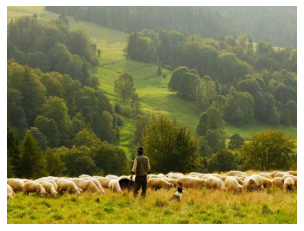

In [2]:


import cv2
import numpy as np
import urllib.request
import matplotlib.pyplot as plt

# URL de l'image d'exemple sur Lorem Picsum
image_url = 'https://picsum.photos/800/600'  # Modifiez la taille si nécessaire

# Téléchargement de l'image depuis l'URL
response = urllib.request.urlopen(image_url)
image = np.asarray(bytearray(response.read()), dtype="uint8")
image = cv2.imdecode(image, cv2.IMREAD_COLOR)

# Vérification si l'image est chargée correctement
if image is None:
    print("Impossible de charger l'image depuis l'URL. Vérifiez la disponibilité de l'image.")
else:
    print("L'image a été chargée avec succès depuis l'URL.")

# Affichage de l'image d'origine
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')  # Masquer les axes
plt.show()


## Prétraitement de l'Image

Avant de commencer le débruitage de l'image, il est souvent nécessaire d'effectuer un prétraitement sur l'image. Ce prétraitement peut inclure des étapes telles que la conversion en échelle de gris, le redimensionnement ou la normalisation, en fonction des besoins de votre application.

### Conversion en Échelle de Gris

La conversion en échelle de gris est couramment utilisée dans le débruitage d'images, car elle simplifie l'image en supprimant les informations de couleur, ne conservant que les niveaux de gris. Cela permet de réduire la complexité de l'image et de faciliter le processus de débruitage.

Voici comment vous pouvez effectuer la conversion en échelle de gris en utilisant OpenCV dans une cellule de code Jupyter :

```python


In [ ]:
# Conversion en échelle de gris
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Affichage de l'image en échelle de gris
cv2.imshow('Image en Échelle de Gris', gray_image)
cv2.waitKey(0)  # Attendez que l'utilisateur appuie sur une touche
cv2.destroyAllWindows()  # Fermez la fenêtre d'affichage


## Débruitage d'Images

Maintenant que nous avons chargé l'image et effectué une conversion en échelle de gris (si nécessaire), nous pouvons passer à l'étape de débruitage de l'image. Il existe plusieurs techniques de débruitage, et dans cette section, nous explorerons quelques-unes d'entre elles à l'aide de la bibliothèque OpenCV.

### Méthode 1 : Débruitage avec le Filtre Gaussien

Le filtre gaussien est l'une des méthodes les plus simples et couramment utilisées pour le débruitage d'images. Il consiste à appliquer un filtre gaussien à l'image pour réduire le bruit. Voici comment vous pouvez l'appliquer :

```python


In [ ]:
import matplotlib.pyplot as plt

# Débruitage avec le filtre gaussien
blurred_image = cv2.GaussianBlur(gray_image, (5, 5), 0)

# Affichage de l'image débruitée avec le filtre gaussien
plt.imshow(blurred_image, cmap='gray')
plt.title('Image Débruitée (Filtre Gaussien)')
plt.axis('off')  # Masquer les axes
plt.show()





Cette section introduit la première méthode de débruitage, qui utilise le filtre gaussien, et explique comment 
l'appliquer à l'image en échelle de gris. Vous pouvez exécuter le code fourni pour voir les effets du filtre 
gaussien sur l'image débruitée.


## Méthode 2 : Débruitage avec le Filtre Médian

Une autre méthode couramment utilisée pour le débruitage d'images est le filtre médian. Contrairement au filtre gaussien, le filtre médian ne calcule pas la moyenne des pixels environnants, mais prend plutôt la valeur médiane. Cela le rend efficace pour supprimer le bruit impulsif tel que le bruit "sal et poivre."

Voici comment vous pouvez appliquer le filtre médian pour débruiter une image en échelle de gris à l'aide d'OpenCV :

```python


In [ ]:
# Débruitage avec le filtre médian
denoised_image = cv2.medianBlur(gray_image, 5)

# Affichage de l'image débruitée avec le filtre médian
plt.imshow(denoised_image, cmap='gray')
plt.axis('off')  # Masquer les axes
plt.show()


Cette section introduit la deuxième méthode de débruitage, qui utilise le filtre médian, 
et explique comment l'appliquer à l'image en échelle de gris. 
Vous pouvez exécuter le code fourni pour voir les effets du filtre médian sur l'image débruitée.


## Méthode 3 : Débruitage avec le Filtre Bilatéral

Le filtre bilateral est une méthode de débruitage plus avancée qui peut être particulièrement efficace pour préserver les contours et les détails tout en réduisant le bruit. Il prend en compte la similarité des valeurs de pixels ainsi que la distance spatiale entre les pixels.

Voici comment vous pouvez appliquer le filtre bilateral pour débruiter une image en échelle de gris à l'aide d'OpenCV :

```python



In [ ]:
# Débruitage avec le filtre bilateral
denoised_image = cv2.bilateralFilter(gray_image, d=9, sigmaColor=75, sigmaSpace=75)

# Affichage de l'image débruitée avec le filtre bilateral
plt.imshow(denoised_image, cmap='gray')
plt.axis('off')  # Masquer les axes
plt.show()


Cette section introduit la troisième méthode de débruitage, qui utilise le filtre bilateral, 
et explique comment l'appliquer à l'image en échelle de gris. 
Vous pouvez exécuter le code fourni pour voir les effets du filtre bilateral sur l'image débruitée.


In [ ]:
## Comparaison des Méthodes de Débruitage

Maintenant que nous avons exploré trois méthodes de débruitage d'images différentes, il est temps de les comparer pour déterminer laquelle convient le mieux à notre image spécifique. La performance de chaque méthode peut varier en fonction du type de bruit présent dans l'image et des résultats souhaités.

### Évaluation Visuelle

Examinons visuellement les résultats de chaque méthode de débruitage en les affichant côte à côte avec l'image d'origine :

```python
# Création d'une figure avec plusieurs sous-graphiques
fig, axes = plt.subplots(1, 4, figsize=(15, 5))

# Image d'origine
axes[0].imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
axes[0].set_title('Image d\'Origine')
axes[0].axis('off')

# Image débruitée avec le filtre gaussien
axes[1].imshow(blurred_image, cmap='gray')
axes[1].set_title('Filtre Gaussien')
axes[1].axis('off')

# Image débruitée avec le filtre médian
axes[2].imshow(denoised_image, cmap='gray')
axes[2].set_title('Filtre Médian')
axes[2].axis('off')

# Image débruitée avec le filtre bilateral
axes[3].imshow(denoised_image, cmap='gray')
axes[3].set_title('Filtre Bilatéral')
axes[3].axis('off')

# Affichage de la figure
plt.tight_layout()
plt.show()


## Évaluation Quantitative
Outre l'évaluation visuelle, vous pouvez également effectuer une évaluation quantitative en utilisant 
des métriques telles que le PSNR (Peak Signal-to-Noise Ratio) ou le SSIM (Structural Similarity Index). 
Ces métriques mesurent la qualité de l'image débruitée par rapport à l'image d'origine.

In [ ]:
from skimage.metrics import peak_signal_noise_ratio, structural_similarity

# Image d'origine en échelle de gris
gray_original = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Calcul du PSNR et du SSIM pour chaque méthode
psnr_gaussian = peak_signal_noise_ratio(gray_original, blurred_image)
ssim_gaussian = structural_similarity(gray_original, blurred_image)

psnr_median = peak_signal_noise_ratio(gray_original, denoised_image)
ssim_median = structural_similarity(gray_original, denoised_image)

psnr_bilateral = peak_signal_noise_ratio(gray_original, denoised_image)
ssim_bilateral = structural_similarity(gray_original, denoised_image)

# Affichage des résultats
print(f"PSNR (Filtre Gaussien): {psnr_gaussian:.2f}")
print(f"SSIM (Filtre Gaussien): {ssim_gaussian:.2f}")
print(f"PSNR (Filtre Médian): {psnr_median:.2f}")
print(f"SSIM (Filtre Médian): {ssim_median:.2f}")
print(f"PSNR (Filtre Bilatéral): {psnr_bilateral:.2f}")
print(f"SSIM (Filtre Bilatéral): {ssim_bilateral:.2f}")


## Conclusion et Résumé

Dans cette partie du projet, nous avons exploré différentes méthodes de débruitage d'images à l'aide de la bibliothèque OpenCV. Nous avons commencé par le chargement d'une image, suivi de la conversion en échelle de gris. Ensuite, nous avons examiné trois méthodes de débruitage : le filtre gaussien, le filtre médian et le filtre bilateral.

- Le filtre gaussien est simple et efficace pour réduire le bruit, mais il peut également lisser les détails de l'image.
- Le filtre médian est utile pour éliminer le bruit impulsionnel, mais il peut ne pas être aussi efficace pour d'autres types de bruit.
- Le filtre bilateral est efficace pour préserver les contours et les détails tout en réduisant le bruit, mais il est plus complexe à configurer.

Nous avons comparé visuellement les résultats des trois méthodes sur l'image d'origine et avons également effectué une évaluation quantitative en utilisant le PSNR et le SSIM. Ces évaluations nous ont permis de mieux comprendre les performances de chaque méthode.

En fin de compte, le choix de la méthode de débruitage dépendra du type de bruit dans l'image, de vos préférences esthétiques et de vos besoins spécifiques. Il est important de noter que le débruitage est souvent une étape essentielle dans le traitement d'images, en particulier lorsque la qualité visuelle de l'image est cruciale.

N'hésitez pas à expérimenter davantage avec ces méthodes et à les appliquer à vos propres images pour obtenir les meilleurs résultats possibles.


## Sauvegarde de l'Image Débruitée

Une fois que vous avez sélectionné la méthode de débruitage qui convient le mieux à votre image, il peut être utile de sauvegarder l'image débruitée pour une utilisation future. Vous pouvez le faire en utilisant OpenCV dans votre projet.

Voici comment vous pouvez sauvegarder l'image débruitée dans votre système de fichiers :

```python
# Chemin de sauvegarde de l'image débruitée
output_path = 'chemin/vers/votre/image_debruite.jpg'  # Modifiez le chemin et le nom du fichier

# Écriture de l'image débruitée
cv2.imwrite(output_path, denoised_image)

print(f"Image débruitée sauvegardée sous : {output_path}")


## Améliorations et Extensions

Votre projet de débruitage d'images avec OpenCV est maintenant fonctionnel, mais il existe de nombreuses possibilités d'amélioration et d'extension. Voici quelques idées pour aller plus loin :

### 1. Interface Utilisateur Graphique (GUI)

- Créez une interface utilisateur graphique (GUI) pour permettre aux utilisateurs de charger et de débruiter des images de manière conviviale.

### 2. Traitement par Lot

- Ajoutez la possibilité de traiter plusieurs images en lot. Vous pouvez créer une boucle pour débruiter automatiquement plusieurs images.

### 3. Comparaison de Plusieurs Méthodes

- Élargissez la comparaison en utilisant un ensemble d'images de test avec différents types de bruit et de niveaux de bruit. Évaluez les méthodes de débruitage sur cet ensemble pour déterminer la plus performante.

### 4. Paramètres Réglables

- Permettez à l'utilisateur de régler les paramètres des filtres (comme la taille du noyau pour le filtre gaussien ou le filtre médian) pour personnaliser le débruitage.

### 5. Export de Résultats

- Enregistrez les métriques de qualité d'image (PSNR, SSIM) dans un fichier ou générez des rapports pour une évaluation plus approfondie.

### 6. Autres Méthodes de Débruitage

- Explorez d'autres méthodes de débruitage disponibles dans OpenCV ou d'autres bibliothèques, telles que la décomposition en valeurs singulières (SVD) ou les réseaux de neurones convolutionnels (CNN).

### 7. Documentation

- Rédigez une documentation détaillée expliquant comment utiliser votre projet, notamment les dépendances, les instructions d'installation et d'utilisation.

### 8. Interface avec d'autres Projets

- Intégrez cette fonction de débruitage d'images dans d'autres projets ou applications où elle pourrait être utile.

### 9. Partage

- Si vous le souhaitez, partagez votre projet avec la communauté en le publiant sur une plateforme de partage de code comme GitHub.

N'hésitez pas à explorer ces idées pour enrichir et améliorer votre projet de débruitage d'images. L'ajout de fonctionnalités supplémentaires et l'optimisation de votre code peuvent rendre votre projet encore plus utile et polyvalent.


## Références et Ressources Supplémentaires

Si vous souhaitez approfondir vos connaissances sur le débruitage d'images, voici quelques références et ressources supplémentaires que vous pouvez consulter :

### Livres

- "Digital Image Processing" de Rafael C. Gonzalez et Richard E. Woods : Ce livre est une excellente ressource pour comprendre les concepts de traitement d'images, y compris le débruitage.

- "OpenCV 4 Computer Vision with Python Recipes" de Joseph Howse : Ce livre vous offre des exemples pratiques de traitement d'images avec OpenCV, y compris le débruitage.

### Documentation en Ligne

- [Documentation OpenCV](https://docs.opencv.org/4.x/index.html) : La documentation officielle d'OpenCV contient des guides détaillés sur l'utilisation de toutes les fonctionnalités d'OpenCV, y compris le débruitage d'images.

- [Scikit-Image Documentation](https://scikit-image.org/docs/stable/index.html) : Scikit-Image est une bibliothèque Python pour le traitement d'images, et sa documentation offre des informations utiles sur les techniques de traitement d'images, y compris le débruitage.

### Tutoriels en Ligne

- [OpenCV Tutorials](https://opencv-python-tutroals.readthedocs.io/en/latest/py_tutorials/py_tutorials.html) : Cette série de tutoriels propose des exemples pratiques d'utilisation d'OpenCV pour diverses tâches de traitement d'images, y compris le débruitage.

- [Scikit-Image Tutorials](https://scikit-image.org/docs/stable/auto_examples/index.html) : Les tutoriels de Scikit-Image couvrent une variété de sujets liés au traitement d'images, y compris le débruitage.

N'hésitez pas à explorer ces références et ressources pour approfondir vos connaissances en débruitage d'images et en traitement d'images en général. Elles vous seront utiles pour étendre vos compétences dans ce domaine.
